Traveling salesman problem applied to network solved using Dijkstra algorithm

TODO:

- 1) Muitos exemplos
- 2) Desenhos
- 3) Tudo estupidamente comentado
- 4) Aplicações práticas (comboios, voos, peças, construção, solução de labirintos)

In [2]:
def distance(G,src,node):
    src_pos = G.nodes[src]['pos']
    node_pos = G.nodes[node]['pos']
    return ((src_pos[0]-node_pos[0])**2 + (src_pos[1]-node_pos[1])**2)**(1/2)

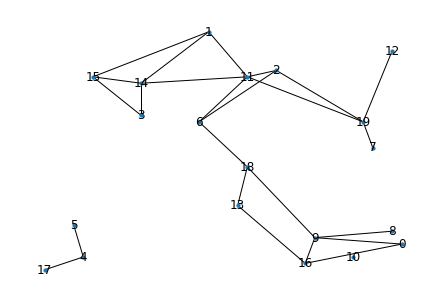

In [10]:
import networkx as nx 
from random import randrange, random

node_number = 20 # number of nodes

L = 200 #box side length
dL = 5 #node generation step
max_distance = 70 # maximum distance for vertice creation
min_distance = 1 # minimum distance for vertice creation
edginess = 60 # average percentage of node connecting 

# -- Graph initialization --#
x = []
y = []
pos={}

G = nx.Graph()
for i in range(0,node_number):
    rx = randrange(0,L,dL)
    ry = randrange(0,L,dL)
    while rx in x and ry in y:
        rx = randrange(0,L,dL)
        ry = randrange(0,L,dL)
    x.append(rx)
    y.append(ry)
    G.add_node(i,pos=(rx,ry))
    for n in G.nodes():
        d = distance(G,n,i)
        if(d < max_distance and d > min_distance):
            r = random()
            if(r < edginess/100):
                G.add_edge(i,n)

#-- Graph plot --#
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos, node_size=10,width=1,with_labels = True)


In [88]:
dist = {} # will hold every node distance from the source node
prev = {} # will hold the path took to reach a specific target node
Q = [] #temporary list holding nodes searched

#-- Auxiliary functions --#
def extract_min(G,source,Q):
    min=Q[0][0]
    i_min = 0
    for i in range(len(Q)):
        if(distance(G,source,Q[i][0]) < min):
            min=Q[i][0]
            i_min = i
    Q.pop(i_min)
    return min

def send_bottom(node,Q,alt):
    Q.insert(0,(node,alt))
    return
#-------------------------#

#-- if no target specified.: Finds shortest distance to all nodes
#-- if target provided: Finds shortest node path and distance target
def Dijkstra(G, source, target=None):

    dist[source] = 0 #distance from source to source = 0 (trivial)    
    for node in G.nodes():
        if node is not source:
            dist[node] = L**2 #Maximum distance (will be overwritten if path found)
            prev[node] = -1 #Signals no path found

        Q.append((node, dist[node])) #Add every node and its distance to Q


    while len(Q) != 0: #While there are still nodes to search
        min_node = extract_min(G,source,Q) #Grab shortest distance node first

        for neighbor in G.neighbors(min_node): #Find neighbors of shortest node
            if(neighbor not in [n[0] for n in Q]): #if neighbor node is not in Q (has already been searched), skip further search
                continue
            alt = dist[min_node] + distance(G,min_node, neighbor) #distance from this neighbor to source is equal to node distance to sorce plus neighbor distance to node
            if alt < dist[neighbor] and dist[min_node] != -1: #if new distance is smaller than prevously calculated, save this node for further search
                dist[neighbor] = alt
                prev[neighbor] = min_node
                send_bottom(neighbor,Q, alt)

        #CASE - TARGET SPECIFIED:
        if(target is not None and target is min_node): #If node is target specified:
            #gather path from prev variable
            path = [target]
            path_node = prev[target]
            while path_node is not source:
                path.insert(0,path_node)
                path_node = prev[path_node]
            path.insert(0,source)
            return [dist[target], path] #return distance and path to target

    #Delete nodes note searched from output
    keys = list(dist.keys())
    for i in keys:
        if dist[i] == L**2:
            dist.pop(i)
    return dist

Find distance to all connected nodes to node 1

   node    -  distance 
    1      -    0.00   
    2      -   56.12   
    3      -   78.15   
    6      -   83.32   
    7      -   130.39  
    8      -   231.84  
    9      -   191.53  
    11     -   40.31   
    12     -   166.78  
    13     -   156.75  
    14     -   53.15   
    15     -   69.46   
    16     -   212.14  
    18     -   126.33  
    19     -   109.77  


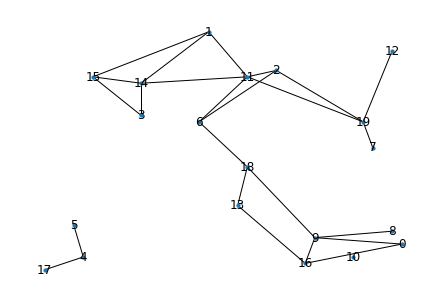

In [89]:
out = Dijkstra(G,1)

nx.draw(G,pos, node_size=10,width=1,with_labels = True)

print("{:^10s} - {:^10s}".format("node","distance"))
for node in out:
    print("{:^10d} - {:^10.2f}".format(node,round(out[node],2)))

distance: 109.77350868874177
path:[1, 11, 19]


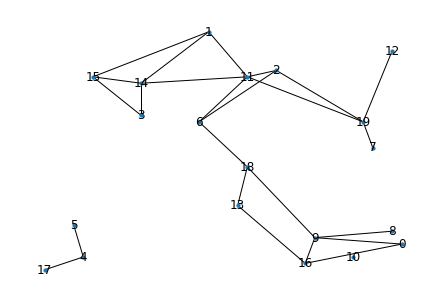

In [93]:
source = 1
target = 19

out= Dijkstra(G,source,target)

nx.draw(G,pos, node_size=10,width=1,with_labels = True)

print("distance: " + str(out[0]))
print("path:" + str(out[1]))
